<a href="https://colab.research.google.com/github/Pranay9392/AIML-2024-2026/blob/main/AIML_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
spotify_data = pd.read_csv("/content/songs_normalize.csv")

# Display the first few rows of the dataset
spotify_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# Display the basic info of the dataset
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
# Generate basic statistics for the numerical columns
numerical_stats = spotify_data.describe()

numerical_stats

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [ ]:
# Check for missing values
missing_values = spotify_data.isnull().sum()

missing_values

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [ ]:
# Frequency counts for 'artist' and 'genre' columns
top_artists = spotify_data['artist'].value_counts().head(10)
top_genres = spotify_data['genre'].value_counts().head(10)

top_artists, top_genres

(artist
 Rihanna           25
 Drake             23
 Eminem            21
 Calvin Harris     20
 Britney Spears    19
 David Guetta      18
 Chris Brown       17
 Kanye West        17
 Beyoncé           16
 Taylor Swift      16
 Name: count, dtype: int64,
 genre
 pop                               428
 hip hop, pop                      277
 hip hop, pop, R&B                 244
 pop, Dance/Electronic             221
 pop, R&B                          178
 hip hop                           124
 hip hop, pop, Dance/Electronic     78
 rock                               58
 rock, pop                          43
 Dance/Electronic                   41
 Name: count, dtype: int64)

# Notes
From basic exploration, I finde that the dataset contains a mix of numerical and categorical data. The genre column have multiple genres for some songs, separated by commas. Also I see that pop is a dominant genre, and artists like Rihanna, Drake, and Eminem have a significant presence in the dataset.

Next, I will do some visulization to help with understanding features. First for continuous and categorical, then feature correlation, scatter plots and word cloud.

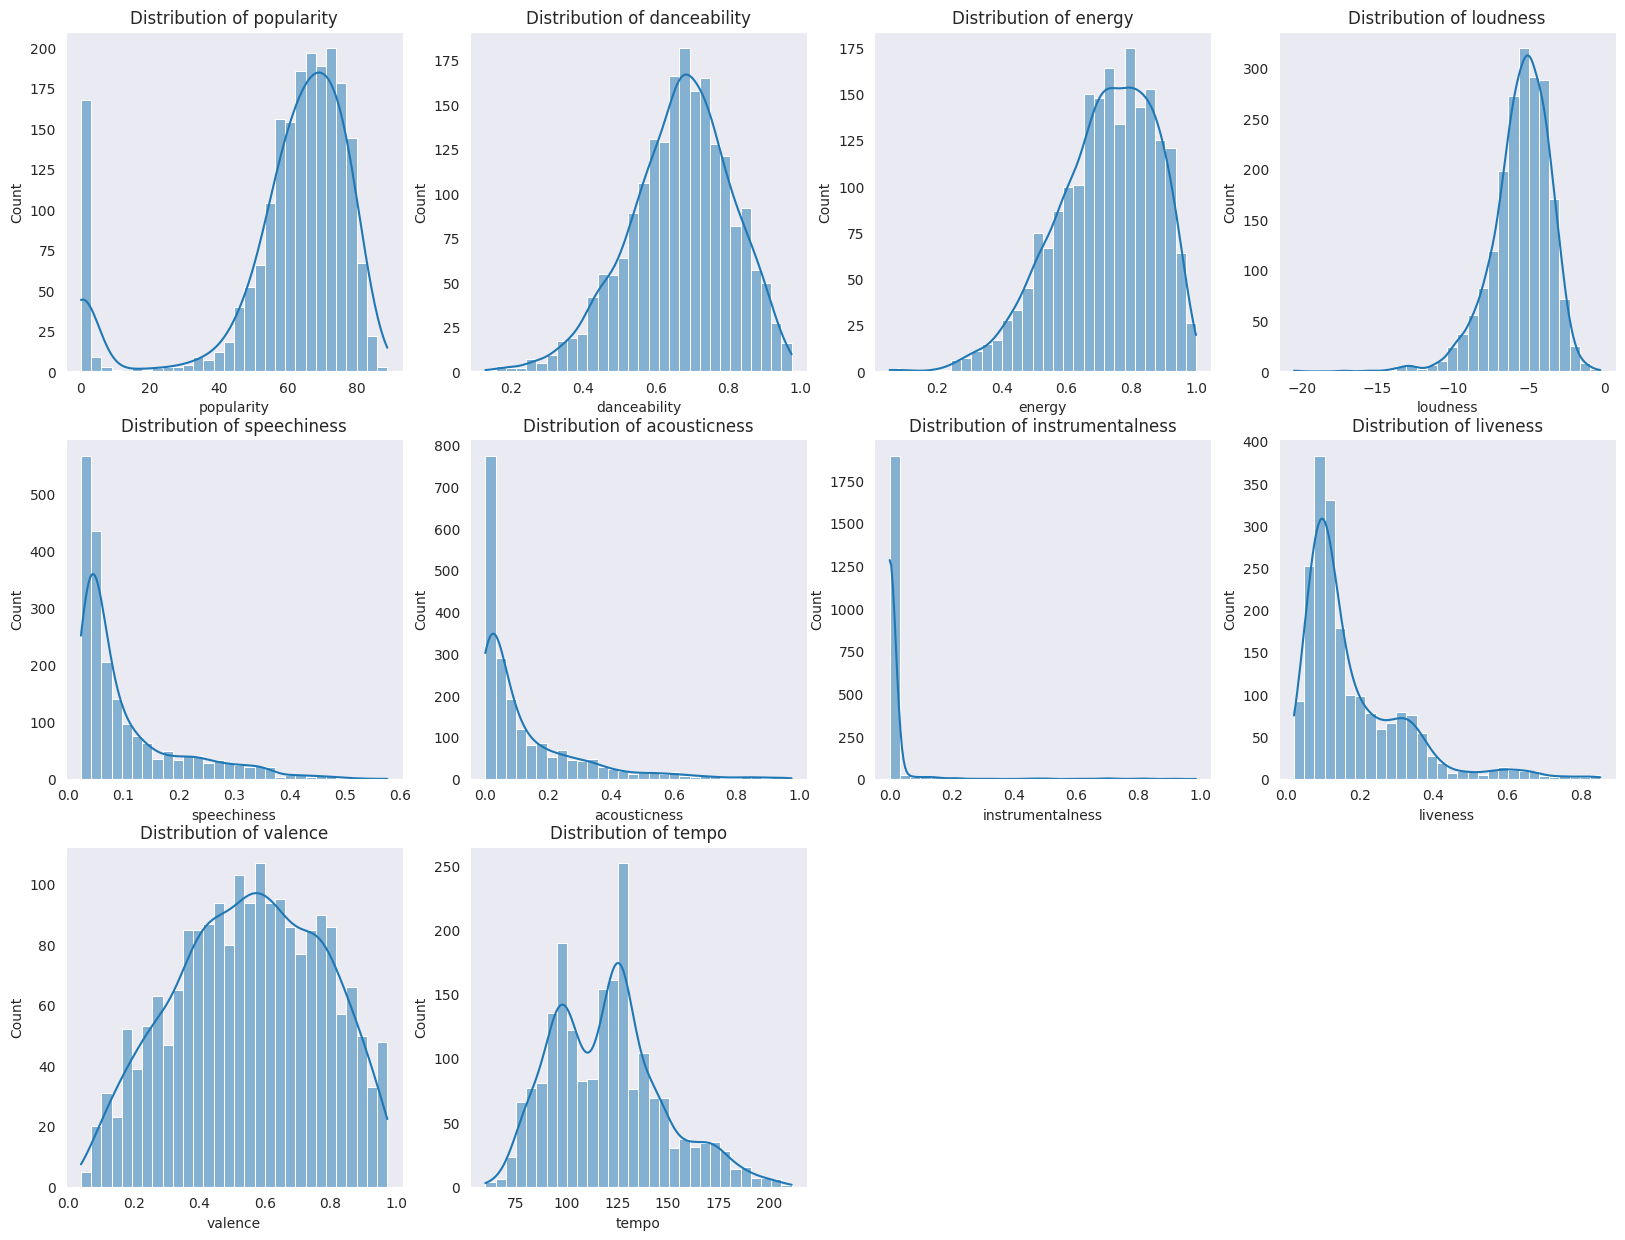

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("dark")

# Initialize the figure
plt.figure(figsize=(20, 15))

# List of features to plot
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create subplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(spotify_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.show()

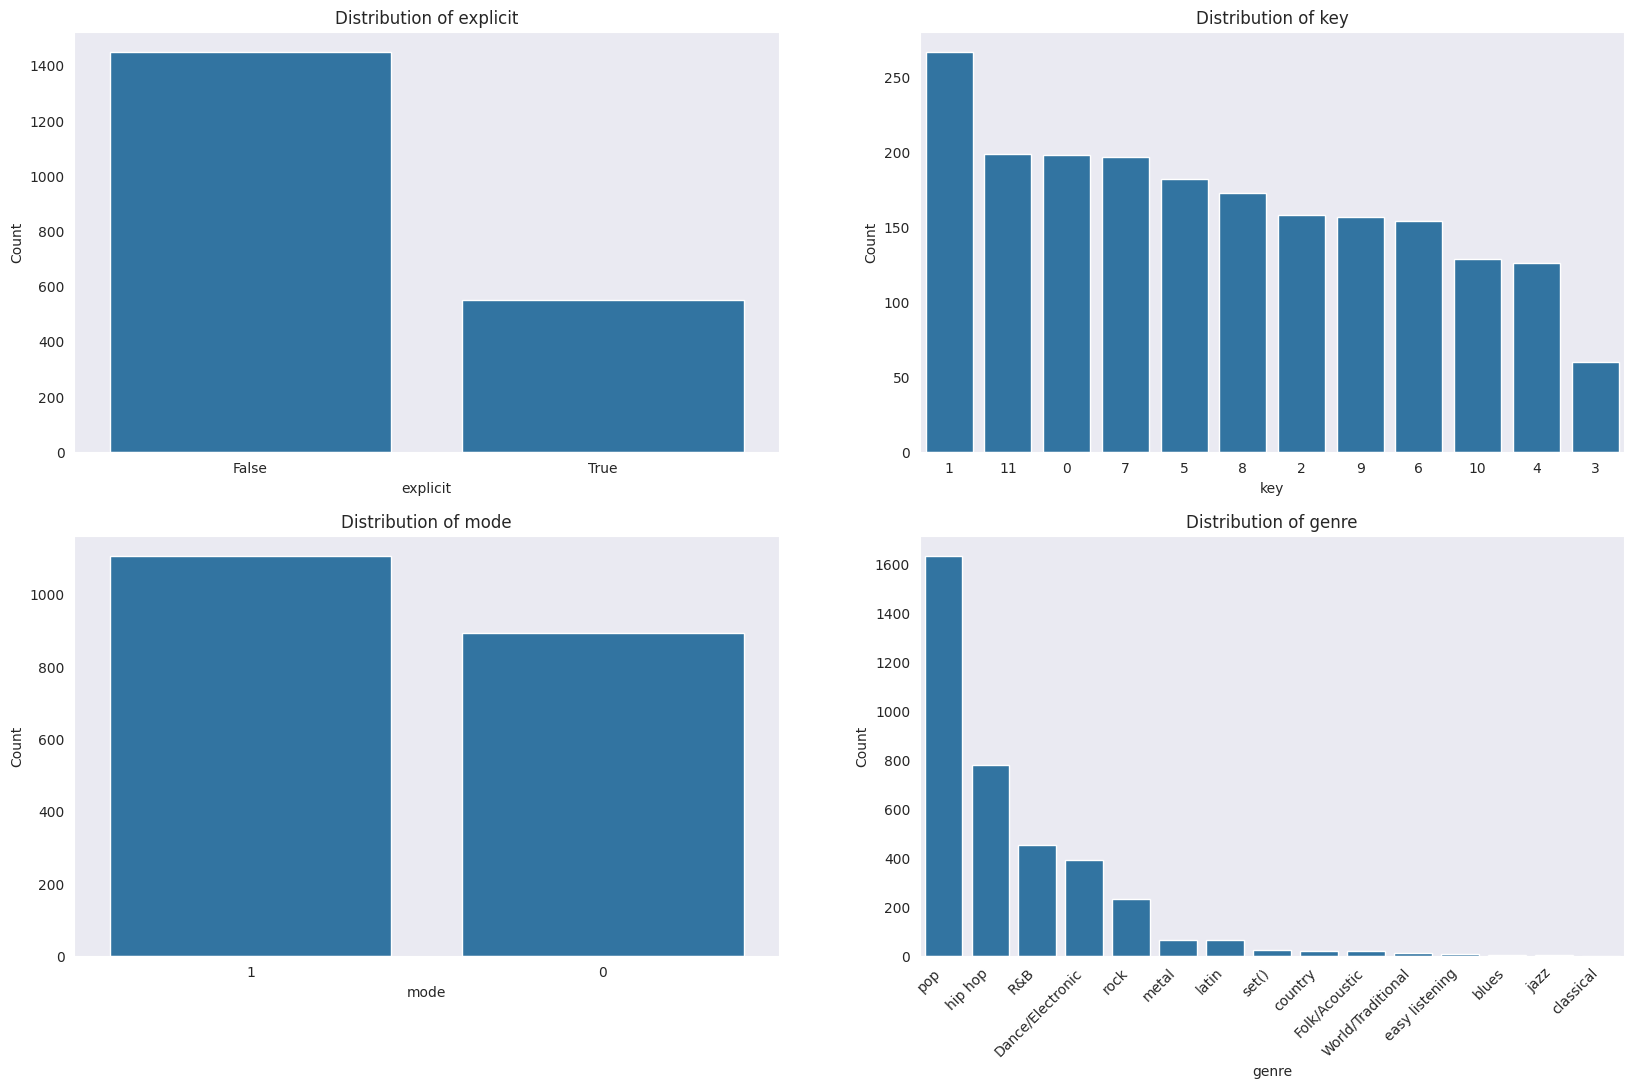

In [ ]:
# Initialize the figure for categorical features
plt.figure(figsize=(20, 12))

# List of categorical features to plot
categorical_features = ['explicit', 'key', 'mode', 'genre']

# Create subplots for each feature
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)

    if feature == 'genre':
        # For genre, we might have multiple genres for a song, so we split and count them
        genres = spotify_data[feature].str.split(', ').explode().value_counts()
        sns.barplot(x=genres.index, y=genres.values)
        plt.xticks(rotation=45, ha='right')
    else:
        sns.countplot(data=spotify_data, x=feature, order=spotify_data[feature].value_counts().index)

    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.show()

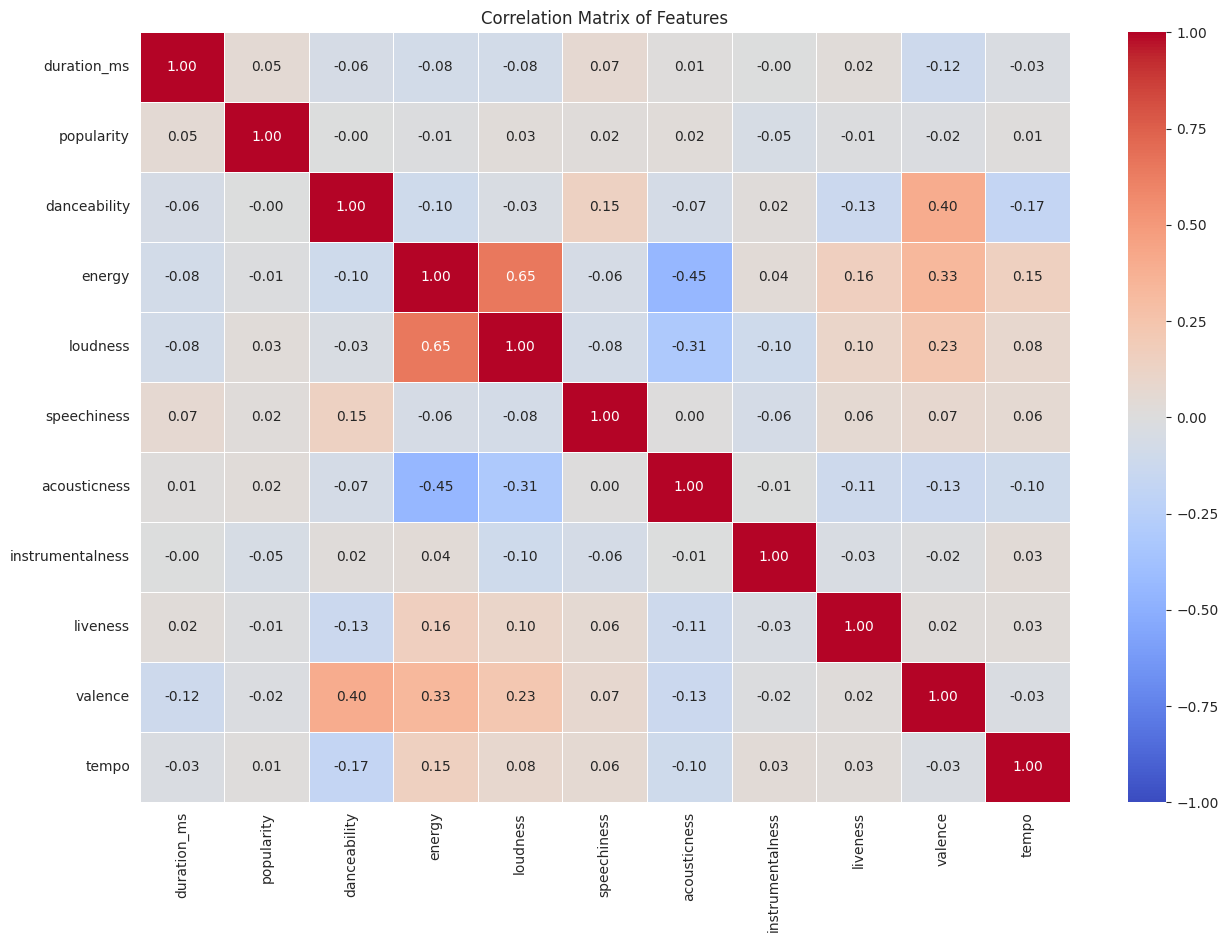

In [ ]:
# Get continuous variable from the dataset
continuous_vars = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Compute the correlation matrix
corr_matrix = spotify_data[continuous_vars].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, fmt=".2f")

# Set the title
plt.title('Correlation Matrix of Features')

plt.show()

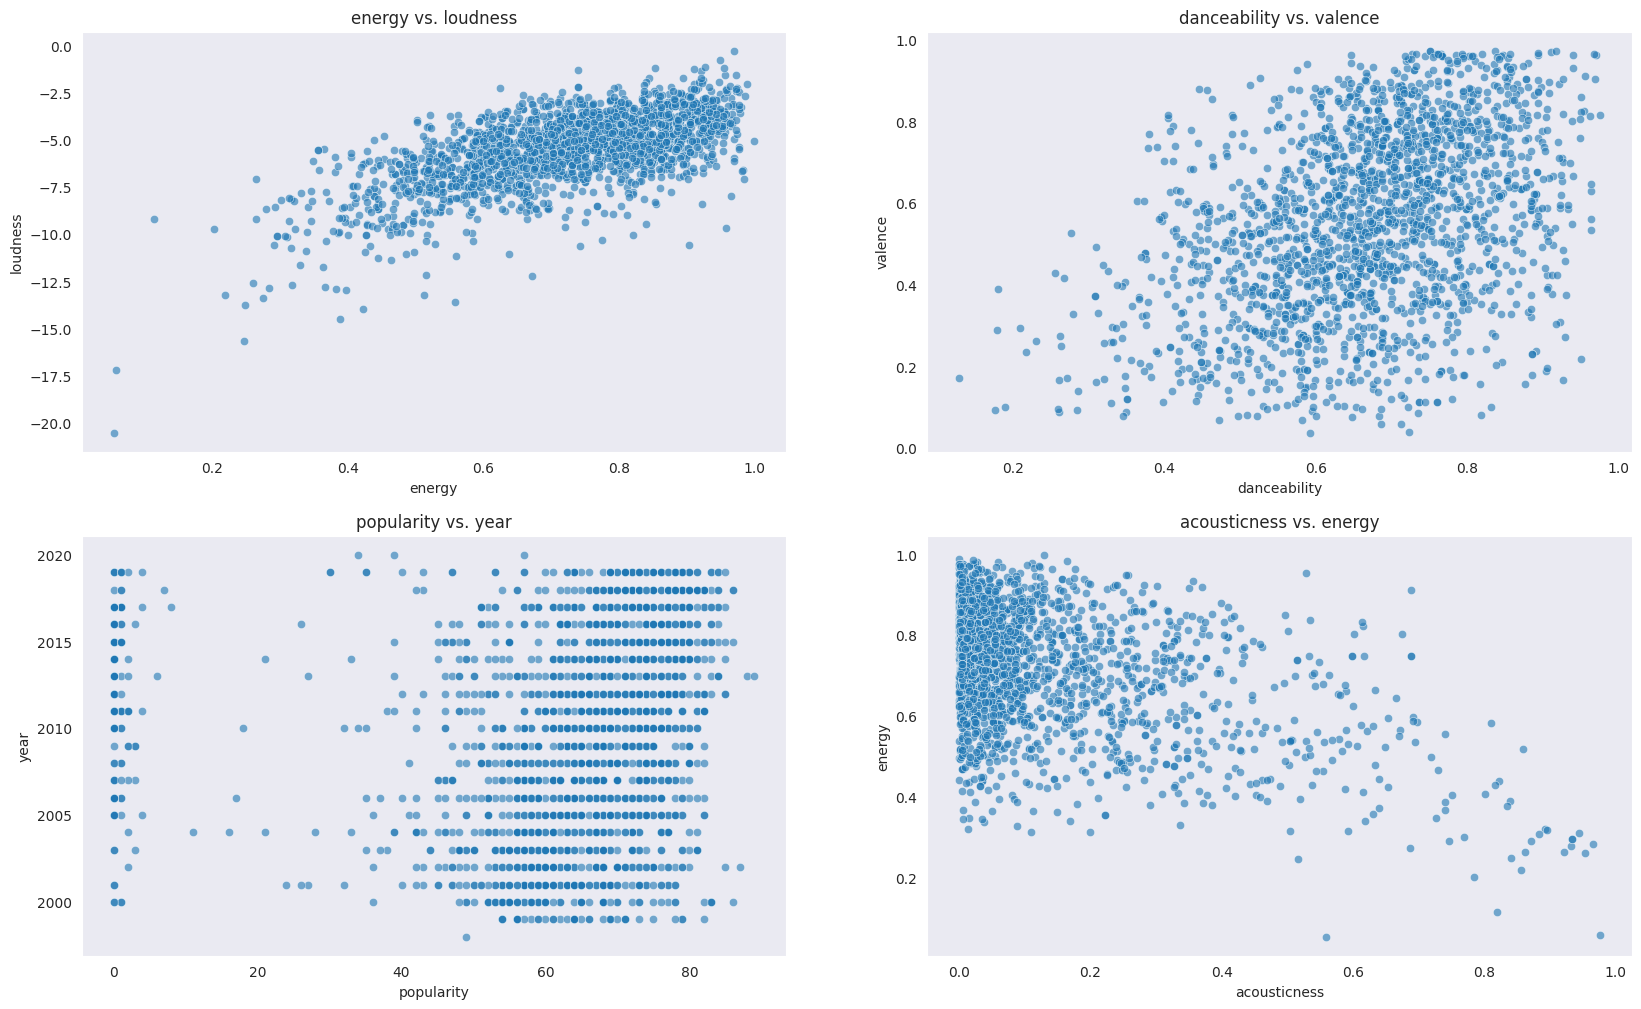

In [ ]:
# Initialize the figure for scatter plots
plt.figure(figsize=(20, 12))

# List of feature pairs to plot
feature_pairs = [('energy', 'loudness'), ('danceability', 'valence'), ('popularity', 'year'), ('acousticness', 'energy')]

# Create subplots for each feature pair
for i, (x, y) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=spotify_data, x=x, y=y, alpha=0.6)
    plt.title(f'{x} vs. {y}')

plt.show()

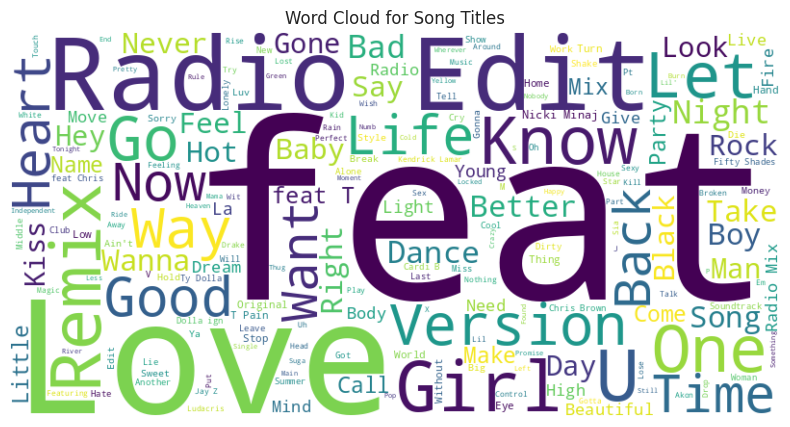

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Generating a word cloud for song titles
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(spotify_data['song']))

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Song Titles')
plt.show()

# Notes
Next, I am moving on to the preparation for recommendation building and before I compute similarities between songs for recommendation process, I need to preprocess the data to ensure it's in a suitable format, this might also involve some feature engineering. Here are the more specific steps I am going to take:

**1.Check for duplicates.**

**2.Convert the 'explicit' column to binary values.**

**3.One-hot encoding.**

**4.Scaling the numerical features.**

One-hot encoding can significantly increase the dimensionality of our dataset if we consider all genres. Before proceeding, it's a good idea to inspect the frequency of each genre to decide if we want to limit our encoding to the most frequent genres or include all.

Features Selection:
The first step is to decide which features to include in our similarity computation. For instance, features like danceability, energy, and loudness provide insights into the musical characteristics of a song. Including these will ensure that songs with similar musical attributes are recommended together.

Scaling:
Once we've decided on the features, we need to scale them. Scaling ensures that all features have equal importance when computing similarity. If not scaled, features with larger values (like duration_ms) might dominate the similarity computation over features with smaller ranges (like danceability which varies between 0 and 1).

In [ ]:
# Check for duplicates
duplicates = spotify_data.duplicated(subset=['artist', 'song'], keep='first')

# Display the number of duplicate rows (if any) and the duplicated rows
num_duplicates = duplicates.sum()

duplicate_rows = spotify_data[duplicates]

num_duplicates, duplicate_rows

(74,
                artist                      song  duration_ms  explicit  year  \
 161       Craig David                Fill Me In       257200     False  2000   
 179   Destiny's Child  Independent Women, Pt. 1       221133     False  2001   
 187         Gabrielle                      Rise       219093     False  2001   
 215       Linkin Park                In the End       216880     False  2000   
 236     Kylie Minogue           Spinning Around       207866     False  2000   
 ...               ...                       ...          ...       ...   ...   
 1832        Jax Jones                   Breathe       207629     False  2017   
 1855          Cardi B              Bodak Yellow       223712      True  2018   
 1921     Travis Scott                SICKO MODE       312820      True  2018   
 1929    Billie Eilish      lovely (with Khalid)       200185     False  2018   
 1984      Post Malone                Better Now       231266      True  2018   
 
       popularity  da

In [ ]:
# Remove the duplicate rows
spotify_data_cleaned = spotify_data.drop_duplicates(subset=['artist', 'song'], keep='first')

# Verify that the duplicates have been removed
remaining_duplicates = spotify_data_cleaned.duplicated(subset=['artist', 'song'], keep='first').sum()

remaining_duplicates

0

In [ ]:
#  Convert the 'explicit' column to binary values (0 and 1)
spotify_data_cleaned['explicit'] = spotify_data_cleaned['explicit'].astype(int)

# Display the unique values of the 'explicit' column to verify the conversion
explicit_values = spotify_data_cleaned['explicit'].unique()

explicit_values

<ipython-input-14-5c66e788c827>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['explicit'] = spotify_data_cleaned['explicit'].astype(int)


array([0, 1])

# Notes
The explicit column has been successfully converted to binary values:
**0 for non-explicit songs
1 for explicit songs.**

Next, one-hot encoding can significantly increase the dimensionality of the dataset if considering all genres. Therefore, before proceeding, I think it is good to inspect the frequency of each genre to decide if I want to limit encoding to the most frequent genres or include all.

In [ ]:
spotify_data_cleaned.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,1,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,1,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,0,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,0,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,0,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


In [ ]:
# Splitting the genre column by comma to consider each genre individually
genres_split = spotify_data_cleaned['genre'].str.split(',', expand=True).stack()

# Count the frequency of each genre
genre_frequencies = genres_split.value_counts()

genre_frequencies

pop                  902
hip hop              744
 pop                 666
 R&B                 420
 Dance/Electronic    336
rock                 155
 rock                 70
 metal                55
 latin                48
Dance/Electronic      41
set()                 22
 Folk/Acoustic        16
latin                 15
R&B                   13
country               10
 country              10
World/Traditional     10
metal                  9
 easy listening        6
 blues                 4
Folk/Acoustic          4
 hip hop               2
 jazz                  2
 classical             1
easy listening         1
Name: count, dtype: int64

In [ ]:
# Trim and clean the genre names to remove extra whitespace
spotify_data_cleaned['genre'] = spotify_data_cleaned['genre'].str.replace(' ,', ',').str.replace(', ', ',').str.strip()

# Split the cleaned genre column to count frequencies again
genres_split_cleaned = spotify_data_cleaned['genre'].str.split(',', expand=True).stack()

# Recount the frequency of each genre
genre_frequencies_cleaned = genres_split_cleaned.value_counts()

genre_frequencies_cleaned

<ipython-input-17-1ec4591e193b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['genre'] = spotify_data_cleaned['genre'].str.replace(' ,', ',').str.replace(', ', ',').str.strip()


pop                  1568
hip hop               746
R&B                   433
Dance/Electronic      377
rock                  225
metal                  64
latin                  63
set()                  22
country                20
Folk/Acoustic          20
World/Traditional      10
easy listening          7
blues                   4
jazz                    2
classical               1
Name: count, dtype: int64

In [ ]:
# Filter rows where genre is "set()"
rows_with_set_genre = spotify_data_cleaned[spotify_data_cleaned['genre'].str.contains('set()')]

rows_with_set_genre

<ipython-input-18-d64c97788555>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  rows_with_set_genre = spotify_data_cleaned[spotify_data_cleaned['genre'].str.contains('set()')]


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,Wheatus,Teenage Dirtbag,241666,1,1999,71,0.625,0.850,4,-3.904,1,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,0,2002,66,0.607,0.923,1,-6.777,1,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
291,Blazin' Squad,Crossroads - Radio Edit,188693,0,2012,40,0.661,0.746,4,-5.153,1,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
428,George Michael,Amazing,265826,0,2004,57,0.805,0.754,10,-6.825,0,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,0,2004,51,0.853,0.911,11,-6.722,0,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
481,Eamon,Fuck It (I Don't Want You Back),225106,1,2004,64,0.828,0.653,0,-6.245,0,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
545,Brian McFadden,Almost Here,229826,0,2004,42,0.561,0.452,9,-7.324,0,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
645,Meck,Thunder in My Heart Again (Radio Edit),189800,0,2005,46,0.679,0.922,2,-4.670,0,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
710,Ida Corr,Let Me Think About It,151973,0,2012,43,0.762,0.754,0,-3.425,0,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,152333,0,2006,17,0.847,0.861,6,-6.632,1,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


# Notes
Along the way, I find here are the rows with the "set()" genre. Given that there are only 22 of them in a larger dataset, I decide to replace with "Unknown": indicating that I don't have information about the genre for these songs.

In [ ]:
# Replace 'set()' genre with 'Unknown'
spotify_data_cleaned.loc[spotify_data_cleaned['genre'] == 'set()', 'genre'] = 'Unknown'

# Verify that the replacement has been done
num_unknown_genre = spotify_data_cleaned[spotify_data_cleaned['genre'] == 'Unknown'].shape[0]

num_unknown_genre

22

In [ ]:
# Identify genres with more than 100 occurrences
frequent_genres = genre_frequencies_cleaned[genre_frequencies_cleaned > 100].index.tolist()

# One-hot encode only the frequent genres
for genre in frequent_genres:
    spotify_data_cleaned[genre] = spotify_data_cleaned['genre'].apply(lambda x: 1 if genre in x else 0)

# Display the head of the dataset to verify the one-hot encoding
spotify_data_cleaned.head()

<ipython-input-20-da7a32ff5c49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned[genre] = spotify_data_cleaned['genre'].apply(lambda x: 1 if genre in x else 0)
<ipython-input-20-da7a32ff5c49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned[genre] = spotify_data_cleaned['genre'].apply(lambda x: 1 if genre in x else 0)
<ipython-input-20-da7a32ff5c49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,genre,pop,hip hop,R&B,Dance/Electronic,rock
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.3550,0.894,95.053,pop,1,0,0,0,0
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,...,0.000000,0.6120,0.684,148.726,"rock,pop",1,0,0,0,1
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,...,0.000000,0.2510,0.278,136.859,"pop,country",1,0,0,0,0
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,...,0.000013,0.3470,0.544,119.992,"rock,metal",0,0,0,0,1
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,...,0.001040,0.0845,0.879,172.656,pop,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the features to scale
features_to_scale = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the specified features
spotify_data_cleaned[features_to_scale] = scaler.fit_transform(spotify_data_cleaned[features_to_scale])

# Display the head of the dataset to verify scaling
spotify_data_cleaned.head()

<ipython-input-21-52cb80ab06f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned[features_to_scale] = scaler.fit_transform(spotify_data_cleaned[features_to_scale])


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,genre,pop,hip hop,R&B,Dance/Electronic,rock
0,Britney Spears,Oops!...I Did It Again,-0.445187,0,2000,0.809097,0.592359,0.731644,-1.207583,0.033661,...,-0.174476,1.226309,1.540788,-0.931725,pop,1,0,0,0,0
1,blink-182,All The Small Things,-1.567649,0,1999,0.902421,-1.667834,1.143179,-1.484202,0.304523,...,-0.174676,3.047037,0.590765,1.059786,"rock,pop",1,0,0,0,1
2,Faith Hill,Breathe,0.557427,0,1999,0.295816,-0.990489,-1.476272,0.452126,-1.801093,...,-0.174676,0.489517,-1.245945,0.619466,"pop,country",1,0,0,0,0
3,Bon Jovi,It's My Life,-0.105781,0,2000,0.855759,-0.833630,1.247696,-1.484202,0.744802,...,-0.174523,1.169633,-0.042583,-0.006376,"rock,metal",0,0,0,0,1
4,*NSYNC,Bye Bye Bye,-0.715022,0,2000,0.249154,-0.384443,1.345680,0.728744,0.362197,...,-0.162948,-0.690060,1.472929,1.947697,pop,1,0,0,0,0


# Notes
I choose to use StandardScaler than **MinMaxScaler** here since it will standardize the features to have **a mean of 0 and a standard deviation of 1** and therefore handles outlier a bit more better. With the completion of the scaling step, the data preprocessing phase is now essentially done.

# Notes
Now I've come to the recommendation building process, just some reference and thinking before acutucally work on the dataset.

I am going to use **Content-based Recommendation System** since I do not have any user-related data on hand for this project, therefore essentially my idea is to generate 10 recommended songs for each random song input:
In a content-based recommendation system, items are matched based on their properties. For this dataset, the contents include features like danceability, energy, loudness, etc., as well as the genres previously one-hot encoded.


**Here's the detailed plan:**

1.Feature Selection:
I'll use the scaled numerical features and the one-hot encoded genres to create a **feature matrix** for each song.

2.Compute Similarity Scores:
For each song, compute similarity scores with other songs. A common metric used is **cosine similarity**.

3.Generate Recommendations:
For a given song, the system will find songs with the highest similarity scores to recommend.

Some notes from reasearch detailing the logic behind why using the method:


**What is Cosine Similarity?**
Cosine similarity is a metric used to measure how similar two vectors (in our case, two songs) are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors. If the vectors are identical, the cosine is 1, and if they're completely dissimilar, the cosine is 0.

**Why Cosine Similarity?**
Imagine our songs as points in a multi-dimensional space where each dimension corresponds to a feature. Songs with similar features will be closer together in this space. The cosine of the angle between their feature vectors will give a measure of their similarity. Since the cosine value ranges between -1 and 1, and we're dealing with non-negative feature values, our cosine similarity values will range between 0 (dissimilar) and 1 (similar).

In [ ]:
# Selecting relevant features for the feature matrix
features_for_recommendation = features_to_scale + frequent_genres
feature_matrix = spotify_data_cleaned[features_for_recommendation]

feature_matrix.head()

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,hip hop,R&B,Dance/Electronic,rock
0,-0.445187,0.809097,0.592359,0.731644,-1.207583,0.033661,-0.624333,0.992066,-0.174476,1.226309,1.540788,-0.931725,1,0,0,0,0
1,-1.567649,0.902421,-1.667834,1.143179,-1.484202,0.304523,-0.571336,-0.683533,-0.174676,3.047037,0.590765,1.059786,1,0,0,0,1
2,0.557427,0.295816,-0.990489,-1.476272,0.452126,-1.801093,-0.777091,0.257509,-0.174676,0.489517,-1.245945,0.619466,1,0,0,0,0
3,-0.105781,0.855759,-0.833630,1.247696,-1.484202,0.744802,-0.594197,-0.590990,-0.174523,1.169633,-0.042583,-0.006376,0,0,0,0,1
4,-0.715022,0.249154,-0.384443,1.345680,0.728744,0.362197,-0.542239,-0.507123,-0.162948,-0.690060,1.472929,1.947697,1,0,0,0,0


# Notes
I've created a feature matrix using the relevant columns. This matrix represents the **"content"** of each song.

The next step is to compute similarity scores. I'll use cosine similarity, a common metric for this purpose. Again, the cosine similarity essentially measures the cosine of the angle between two vectors, and it will give us a value between -1 and 1, where:

*1 indicates the highest similarity (i.e., the vectors are identical).
0 indicates no similarity.
-1 indicates that the vectors are diametrically opposed (this is not typically seen in this context since there aren't any negative values in our feature matrix).*

I have a quick visulization generated by Chatgpt explaining here:

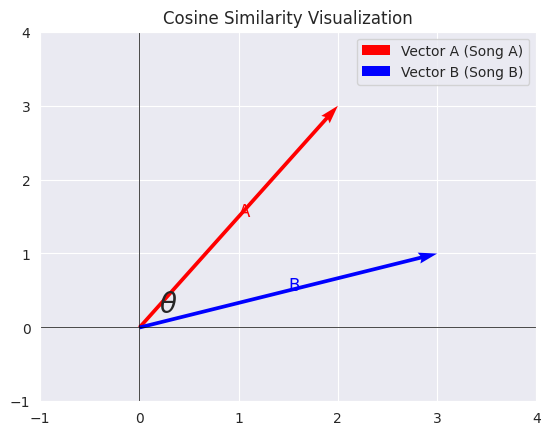

In [ ]:
import numpy as np

# Define two vectors
A = np.array([2, 3])
B = np.array([3, 1])

# Plot the vectors
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A (Song A)')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B (Song B)')

# Add some annotations to make it clear
plt.text(A[0]/2, A[1]/2, 'A', fontsize=12, color='r')
plt.text(B[0]/2, B[1]/2, 'B', fontsize=12, color='b')
plt.text(0.2, 0.2, r'$\theta$', fontsize=20)

# Set the limits and labels
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Cosine Similarity Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix for the songs
similarity_matrix = cosine_similarity(feature_matrix)

# Convert the matrix to a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=spotify_data_cleaned['song'], columns=spotify_data_cleaned['song'])

similarity_df.head()

song,Oops!...I Did It Again,All The Small Things,Breathe,It's My Life,Bye Bye Bye,Thong Song,The Real Slim Shady,Rock DJ,Say My Name,Lady - Hear Me Tonight,...,How Do You Sleep?,Options,Motivation,Sorry,Goodbyes (Feat. Young Thug),Sucker,Cruel Summer,The Git Up,Dancing With A Stranger (with Normani),Circles
song,,,,,,,,,,,,,,,,,,,,,
Oops!...I Did It Again,1.000000,0.480263,-0.226873,0.435148,0.081819,0.387973,0.177747,0.563769,0.292667,0.084699,...,0.056609,0.476783,0.338988,0.494170,-0.308459,0.554170,-0.230117,0.295826,0.202875,0.379336
All The Small Things,0.480263,1.000000,0.053349,0.801015,0.314152,0.052383,-0.414049,0.486621,-0.041063,-0.217623,...,0.256411,-0.294035,0.693433,0.451212,-0.084034,0.275026,0.244878,-0.058827,-0.071227,0.171619
Breathe,-0.226873,0.053349,1.000000,-0.190772,-0.172074,-0.043545,-0.281880,-0.078837,-0.049261,-0.133374,...,0.253731,-0.282263,-0.209188,-0.218482,0.097040,-0.326966,0.259831,0.048649,0.496530,-0.304187
It's My Life,0.435148,0.801015,-0.190772,1.000000,0.124908,0.194618,-0.111597,0.443667,0.002317,0.033561,...,0.332783,-0.149479,0.462776,0.155229,-0.215039,0.185771,-0.120491,-0.296402,-0.347170,0.458753
Bye Bye Bye,0.081819,0.314152,-0.172074,0.124908,1.000000,0.329679,-0.031039,0.144132,0.280802,0.312975,...,-0.057771,-0.255962,0.778155,0.544746,-0.038472,0.523997,0.669045,-0.025569,-0.264489,0.086590


# Notes
The cosine similarity scores have been computed for the songs using the feature matrix. This similarity matrix represents how similar each song is to every other song in the dataset.

For example, if you look at the song "Oops!...I Did It Again", you can see its similarity scores with all other songs. A score of 1 with itself (as expected) and other values ranging between -1 and 1 with other songs.

With this similarity matrix in hand, I can now go on and generate recommendations for any given song by finding the songs with the highest similarity scores.

I am a bit of Drake fans, therefore I am going to filter and try the system with his tracks.

In [ ]:
# Filter rows to get songs by Drake
drake_songs = spotify_data_cleaned[spotify_data_cleaned['artist'] == 'Drake']['song']

drake_songs.tolist()

['Forever',
 'Best I Ever Had',
 'Over',
 'Find Your Love',
 'Headlines',
 'The Motto',
 'Take Care',
 'Started From the Bottom',
 "Hold On, We're Going Home",
 'Hotline Bling',
 'Jumpman',
 'One Dance',
 'Pop Style',
 'Too Good',
 'Passionfruit',
 "God's Plan",
 'Nonstop',
 'In My Feelings',
 "I'm Upset",
 'Nice For What',
 'Money In The Grave (Drake ft. Rick Ross)']

In [ ]:
# Get top 10 most similar songs to "Started From the Bottom"
num_recommendations = 10
recommended_songs = similarity_df['Started From the Bottom'].sort_values(ascending=False).head(num_recommendations + 1)[1:]

recommended_songs

song
It's A Vibe                               0.890408
Like You (feat. Ciara)                    0.877179
Ric Flair Drip (with Metro Boomin)        0.858600
Gimme That                                0.844607
Sure Thing                                0.829202
Wiggle (feat. Snoop Dogg)                 0.821537
Work                                      0.819177
Wow.                                      0.805994
Pullin' Me Back                           0.804692
U and Dat (feat. T. Pain & Kandi Girl)    0.799674
Name: Started From the Bottom, dtype: float64

# Notes
**Put the recommendation logic in a function for more convenient use and check.**

In [ ]:
def get_recommendations(song_name, num_recommendations=10):
    # Check if the song exists in the data
    if song_name not in similarity_df.index:
        return f"Sorry, the song '{song_name}' was not found in the database."

    # Get the top recommended songs
    recommended = similarity_df[song_name].sort_values(ascending=False).head(num_recommendations + 1)[1:]

    # Return the recommended song names
    return recommended.index.tolist()

In [ ]:
song_name = "Started From the Bottom"
recommendations = get_recommendations(song_name)

print(f"Top 10 recommended songs for '{song_name}':")
for song in recommendations:
    print(song)

Top 10 recommended songs for 'Started From the Bottom':
It's A Vibe
Like You (feat. Ciara)
Ric Flair Drip (with Metro Boomin)
Gimme That
Sure Thing
Wiggle (feat. Snoop Dogg)
Work
Wow.
Pullin' Me Back
U and Dat (feat. T. Pain & Kandi Girl)


# Summary
I have tried a few times with this recommendation system for different tracks inputs for **subjective evaluation**, while most of the time, the results are acceptable but I still want to hightlight some of the major limitations for this project:

**Diversity of Recommendations**: Depending solely on cosine similarity may lead to very similar recommendations, potentially lacking diversity. Implementing a diversification strategy might enhance the experience.

**Explicit Feedback Incorporation**: The system currently doesn't incorporate user feedback or ratings. Integrating explicit user feedback might lead to more personalized recommendations. Considering I am only using a simple dataset for the demo, not including user-related data, therefore only content-based filtering is applied, while hybrid approach might enhance the diversity and layers of the recommendation project.

**Tuning and Validation**: This project didn't include hyperparameter tuning or validation techniques. Implementing cross-validation or using a validation set could lead to more robust recommendations.

# Web App Demo

I went on one more step and developed a simple, interactive **local web application using Flask to demonstrate the song recommendation system**. The web app provides a user-friendly interface where one can input a song name and receive a list of similar songs based on preferences.

In [ ]:
from IPython.display import Image
Image(filename="/kaggle/input/web-app-demo/home.png")

In [ ]:
from IPython.display import Image
Image(filename="/kaggle/input/web-app-demo/recommendation.png")